In [828]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [829]:
data_file = "conso.txt"

In [830]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [831]:
text='test'
filename='text.txt'
#save_text(filename)

In [832]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [833]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


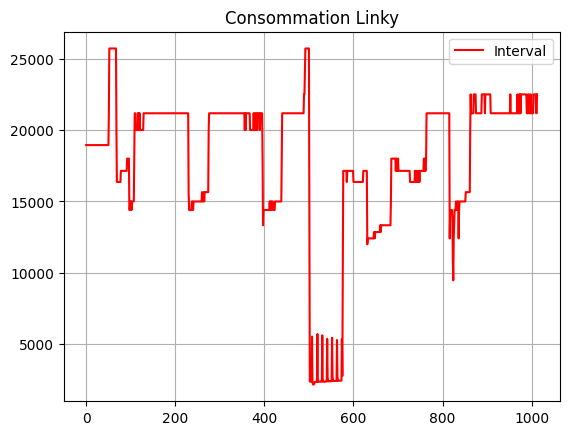

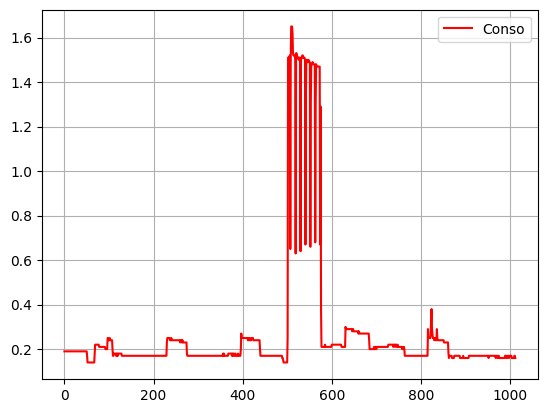

In [834]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [835]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [836]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125475 entries, 0 to 125474
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  125475 non-null  int64  
 1   kWh       125475 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [837]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
125470,16981,0.21
125471,17019,0.21
125472,17051,0.21
125473,17102,0.21


<Axes: >

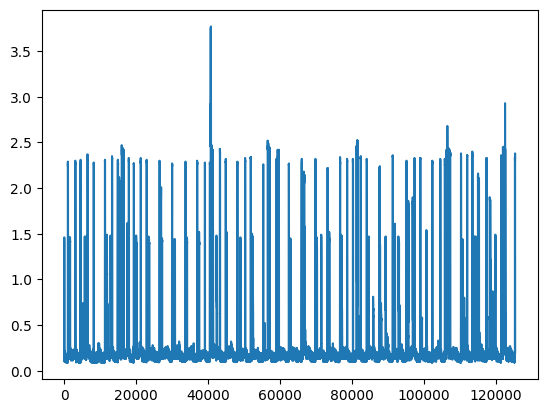

In [838]:
conso_data['kWh'].plot()

In [839]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858
125471,17019,0.21,17.019,211.528292,2960511877
125472,17051,0.21,17.051,211.131312,2960528928
125473,17102,0.21,17.102,210.501696,2960546030


In [840]:
# index dernier echantillon
l=len(conso_data)-1
l

125474

In [841]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2960564222000

In [842]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 40, 38, 182824)

In [843]:
old

False

In [844]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125475 entries, 0 to 125474
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   125475 non-null  int64         
 1   kWh        125475 non-null  float64       
 2   sec        125475 non-null  float64       
 3   Wh         125475 non-null  float64       
 4   cumul(ms)  125475 non-null  int64         
 5   dates      125475 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 5.7 MB


In [845]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:41:04.471824,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:41:30.714824,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:41:56.599824,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:42:22.353824,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:42:48.127824,07/03/2024
...,...,...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024


In [846]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:41:04.471824   
 
          days  
 0  07/03/2024  ,
         Interval  kWh     sec          Wh   cumul(ms)  \
 125474     18192  0.2  18.192  197.889182  2960564222   
 
                             dates        days  
 125474 2024-04-10 08:03:22.404824  10/04/2024  )

In [847]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('10/04/2024', 4, 2024)

In [848]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
124541,29818,0.12,29.818,120.732443,2931569438,2024-04-10 00:00:07.620824,10/04/2024
124542,30479,0.12,30.479,118.114111,2931599917,2024-04-10 00:00:38.099824,10/04/2024
124543,34231,0.10,34.231,105.167830,2931634148,2024-04-10 00:01:12.330824,10/04/2024
124544,35979,0.10,35.979,100.058367,2931670127,2024-04-10 00:01:48.309824,10/04/2024
124545,36120,0.10,36.120,99.667774,2931706247,2024-04-10 00:02:24.429824,10/04/2024
...,...,...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024


In [849]:
day

'10/04/2024'

In [850]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:41:04.471824,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:41:30.714824,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:41:56.599824,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:42:22.353824,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:42:48.127824,07/03/2024
...,...,...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024


In [851]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [852]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.157
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.547
13/03/2024,3.534
14/03/2024,3.663
15/03/2024,3.560


In [853]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.316938
dtype: float64

In [854]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.585
dtype: float64

In [855]:
filename='conso_par_jour.csv'
df = grouped.count()/1000
df.to_csv(filename)
filename='../conso_par_jour.csv'
df.to_csv(filename)

In [856]:
df.tail(7)

,kWh
days,
04/04/2024,3.479
05/04/2024,4.412
06/04/2024,3.404
07/04/2024,4.074
08/04/2024,3.780
09/04/2024,4.060
10/04/2024,0.934


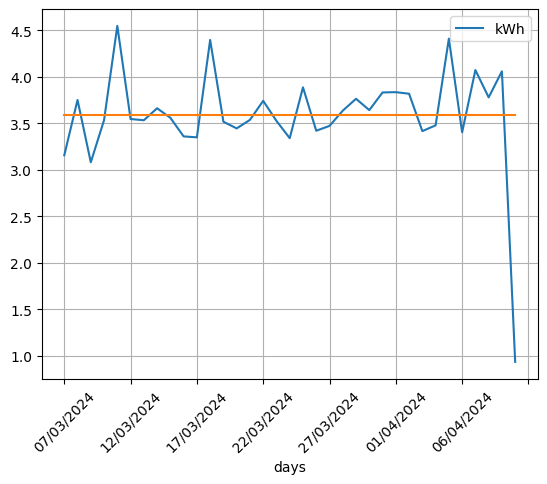

In [857]:
df.plot()#kind='bar')
plt.plot((0,len(df)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [858]:
#manuel
#day = '11/03/2024'


In [859]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

934

In [860]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
124541,29818,0.12,29.818,120.732443,2931569438,2024-04-10 00:00:07.620824,10/04/2024
124542,30479,0.12,30.479,118.114111,2931599917,2024-04-10 00:00:38.099824,10/04/2024
124543,34231,0.10,34.231,105.167830,2931634148,2024-04-10 00:01:12.330824,10/04/2024
124544,35979,0.10,35.979,100.058367,2931670127,2024-04-10 00:01:48.309824,10/04/2024
124545,36120,0.10,36.120,99.667774,2931706247,2024-04-10 00:02:24.429824,10/04/2024
...,...,...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024


In [861]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [862]:
df

,kWh
days,
07/03/2024,3.157
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.547
13/03/2024,3.534
14/03/2024,3.663
15/03/2024,3.560


In [863]:
conso_day.head(1).dates, conso_day.tail(1).dates


(124541   2024-04-10 00:00:07.620824
 Name: dates, dtype: datetime64[ns],
 125474   2024-04-10 08:03:22.404824
 Name: dates, dtype: datetime64[ns])

In [864]:
conso_day.loc[:,'dates']

124541   2024-04-10 00:00:07.620824
124542   2024-04-10 00:00:38.099824
124543   2024-04-10 00:01:12.330824
124544   2024-04-10 00:01:48.309824
124545   2024-04-10 00:02:24.429824
                    ...            
125470   2024-04-10 08:02:13.040824
125471   2024-04-10 08:02:30.059824
125472   2024-04-10 08:02:47.110824
125473   2024-04-10 08:03:04.212824
125474   2024-04-10 08:03:22.404824
Name: dates, Length: 934, dtype: datetime64[ns]

In [865]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_18848\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:7,29818,0.12,29.818,120.732443,2931569438,2024-04-10 00:00:07.620824,10/04/2024
0:0:38,30479,0.12,30.479,118.114111,2931599917,2024-04-10 00:00:38.099824,10/04/2024
0:1:12,34231,0.10,34.231,105.167830,2931634148,2024-04-10 00:01:12.330824,10/04/2024
0:1:48,35979,0.10,35.979,100.058367,2931670127,2024-04-10 00:01:48.309824,10/04/2024
0:2:24,36120,0.10,36.120,99.667774,2931706247,2024-04-10 00:02:24.429824,10/04/2024
...,...,...,...,...,...,...,...
8:2:13,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
8:2:30,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
8:2:47,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024


In [866]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('08:03:26', 0.934)

In [867]:
df['kWh']

heure
0:0:7     0.12
0:0:38    0.12
0:1:12    0.10
0:1:48    0.10
0:2:24    0.10
          ... 
8:2:13    0.21
8:2:30    0.21
8:2:47    0.21
8:3:4     0.21
8:3:22    0.20
Name: kWh, Length: 934, dtype: float64

In [868]:
conso_jour=len(df['kWh'])

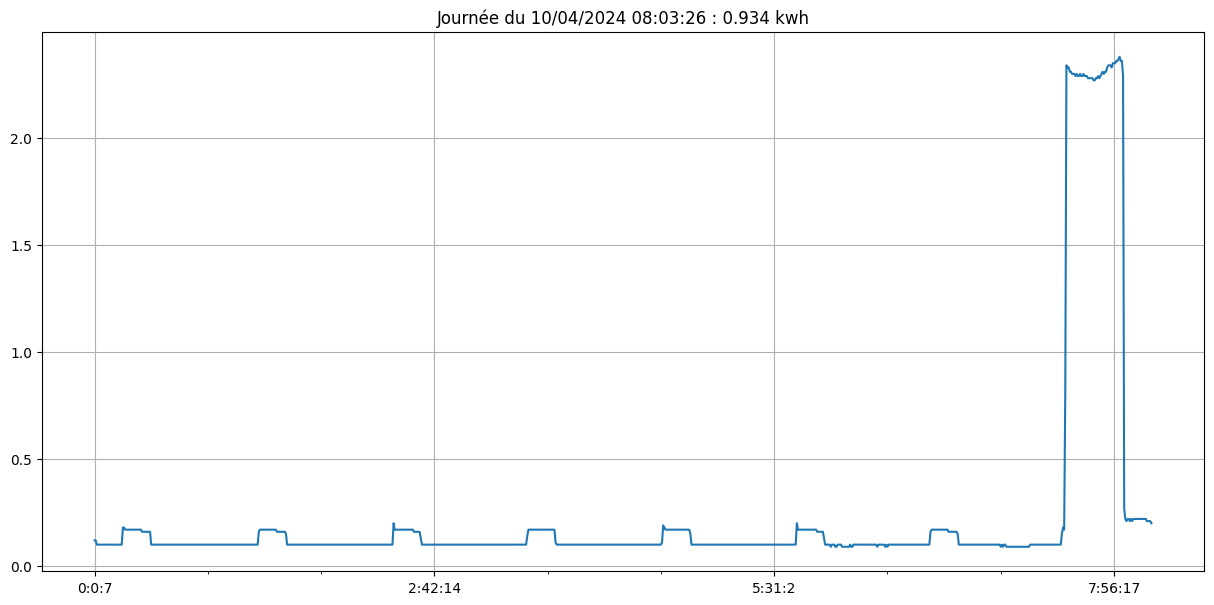

In [869]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [870]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [871]:
df['power']

heure
0:0:7     0.12
0:0:38    0.12
0:1:12    0.10
0:1:48    0.10
0:2:24    0.10
          ... 
8:2:13    0.21
8:2:30    0.21
8:2:47    0.21
8:3:4     0.21
8:3:22    0.20
Name: power, Length: 934, dtype: float64

<Axes: xlabel='heure'>

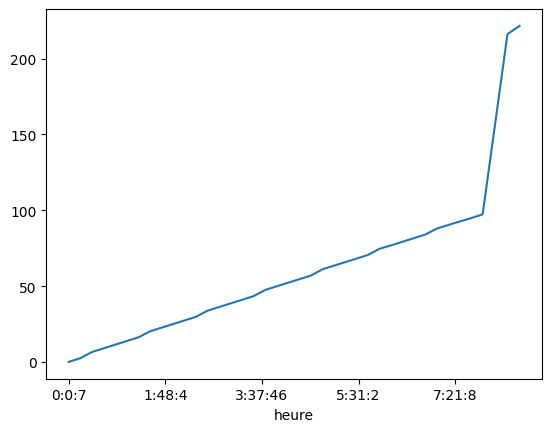

In [872]:
evo=df['power'].cumsum()
evo.plot()

52

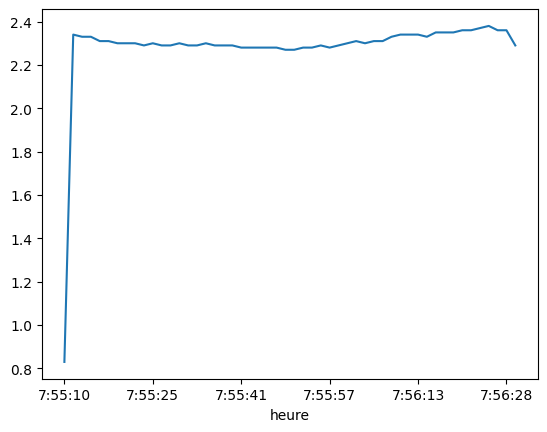

In [873]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

207

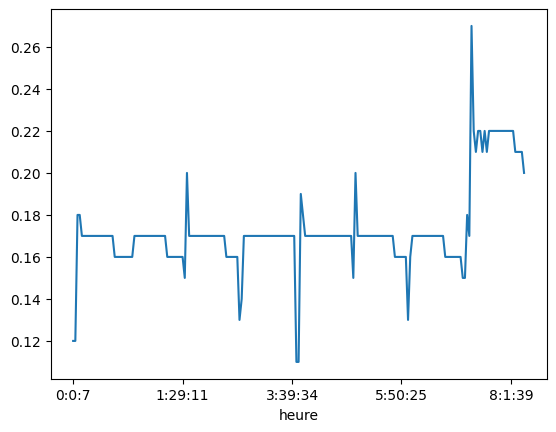

In [874]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

882

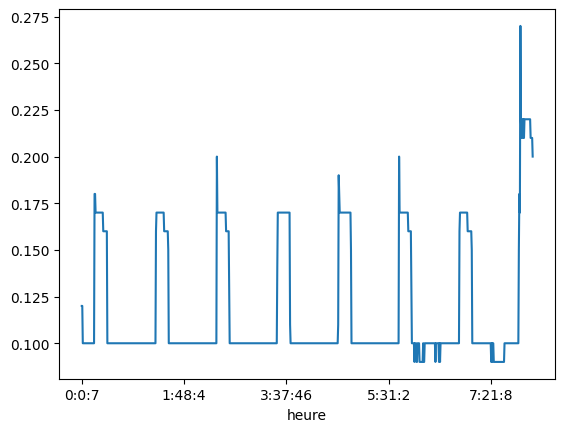

In [875]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [876]:
time = conso_data['dates']
time


0        2024-03-07 01:41:04.471824
1        2024-03-07 01:41:30.714824
2        2024-03-07 01:41:56.599824
3        2024-03-07 01:42:22.353824
4        2024-03-07 01:42:48.127824
                    ...            
125470   2024-04-10 08:02:13.040824
125471   2024-04-10 08:02:30.059824
125472   2024-04-10 08:02:47.110824
125473   2024-04-10 08:03:04.212824
125474   2024-04-10 08:03:22.404824
Name: dates, Length: 125475, dtype: datetime64[ns]

In [877]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [878]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [879]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

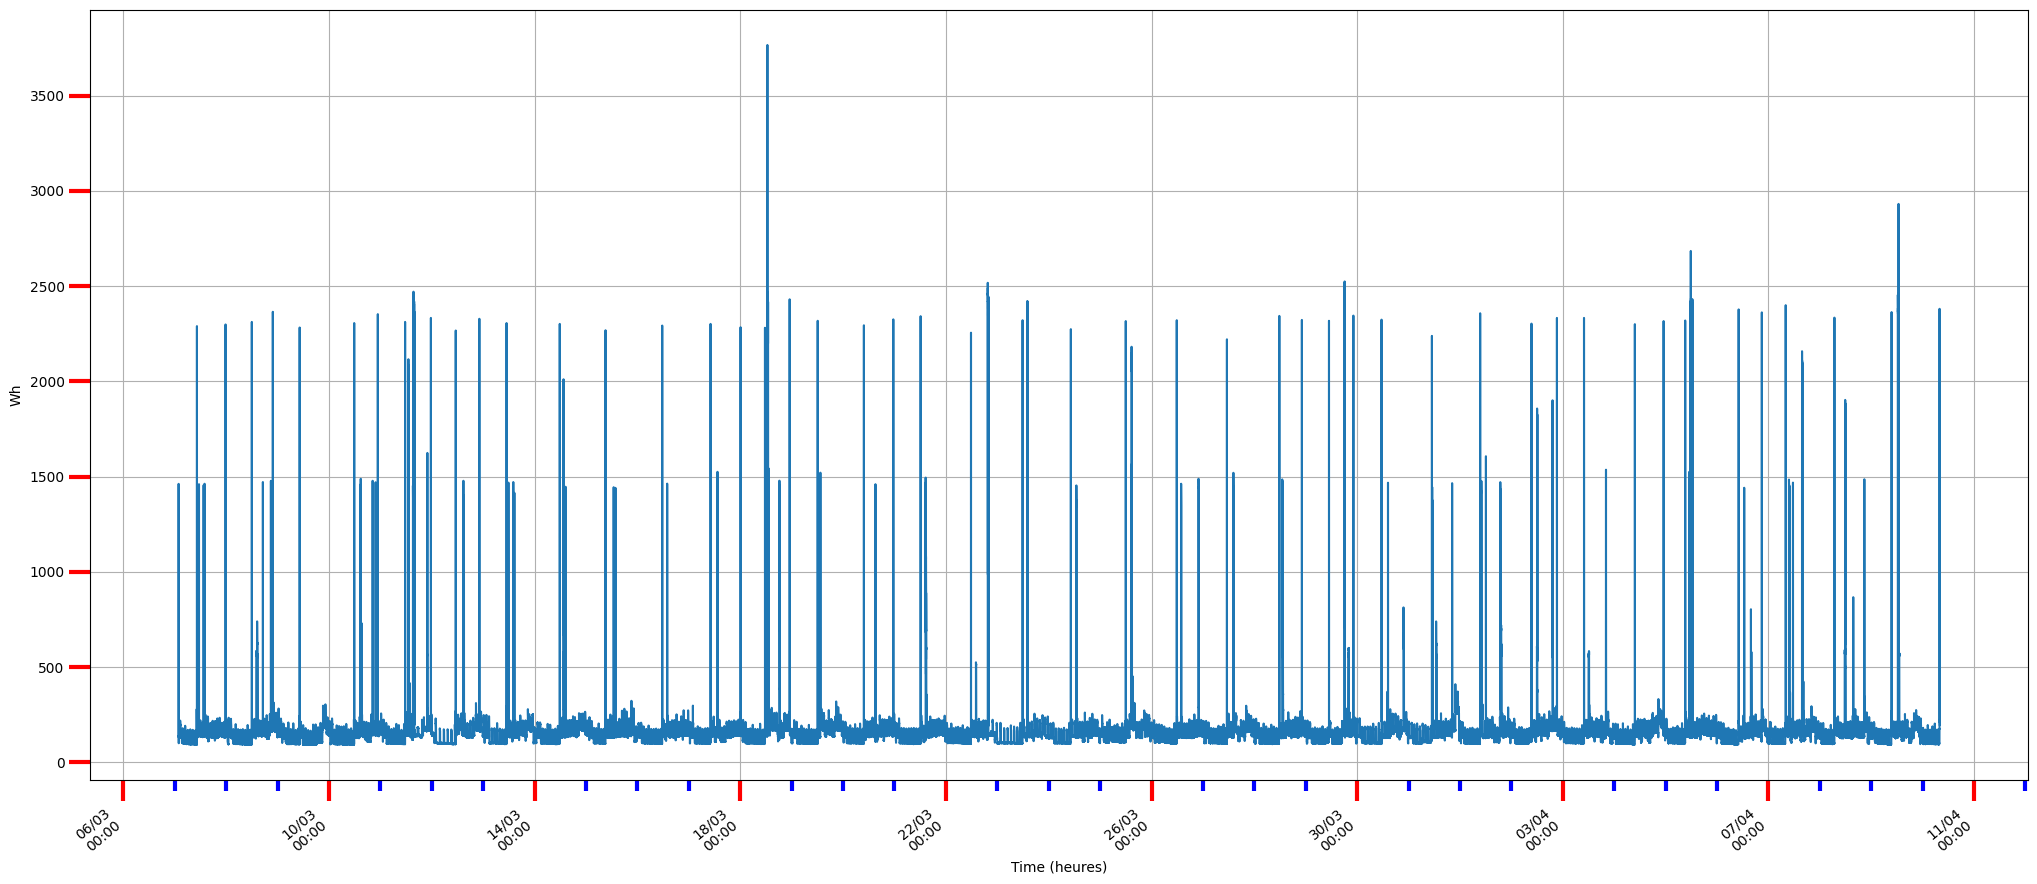

In [880]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [881]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
125474,18192,0.2,18.192,197.889182,2960564222,2024-04-10 08:03:22.404824,10/04/2024


In [882]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2960564222000

# Slice of last 1 kWh

In [883]:
l = len(conso_data)  # total watt consommés
l

125475

In [884]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(125475, 1000)

In [885]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [886]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 124475     27324  0.13  27.324  131.752306  2929715420   
 124476     27586  0.13  27.586  130.500979  2929743006   
 124477     27962  0.13  27.962  128.746155  2929770968   
 124478     28690  0.12  28.690  125.479261  2929799658   
 124479     28590  0.12  28.590  125.918153  2929828248   
 ...          ...   ...     ...         ...         ...   
 125470     16981  0.21  16.981  212.001649  2960494858   
 125471     17019  0.21  17.019  211.528292  2960511877   
 125472     17051  0.21  17.051  211.131312  2960528928   
 125473     17102  0.21  17.102  210.501696  2960546030   
 125474     18192  0.20  18.192  197.889182  2960564222   
 
                             dates        days  
 124475 2024-04-09 23:29:13.602824  09/04/2024  
 124476 2024-04-09 23:29:41.188824  09/04/2024  
 124477 2024-04-09 23:30:09.150824  09/04/2024  
 124478 2024-04-09 23:30:37.840824  09/04/2024  
 124479 2024-04-09 23:31:06.430824  09

In [887]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [888]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [889]:
cumtime_end,cumtime_start

(2960564222000, 2929743006000)

In [890]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

30821216000

In [891]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 10, 8, 3, 31, 214372),
 datetime.datetime(2024, 4, 9, 23, 29, 49, 998372),
 '10/04/2024 08:03:22')

In [892]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:41:04.471824,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:41:30.714824,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:41:56.599824,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:42:22.353824,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:42:48.127824,07/03/2024
...,...,...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024


In [893]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('09/04/2024 23:29:41', '10/04/2024 08:03:22')

In [894]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-09 23:29:13.602824', '2024-04-10 08:03:22.404824')

In [895]:
k

1

In [896]:
data.Interval.tail(1000)

124475    27324
124476    27586
124477    27962
124478    28690
124479    28590
          ...  
125470    16981
125471    17019
125472    17051
125473    17102
125474    18192
Name: Interval, Length: 1000, dtype: int64

In [897]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.576701666666668, 2.798278514603807, 8, 34, 36)

In [898]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_18848\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [899]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
124475,27324,0.13,27.324,131.752306,2929715420,2024-04-09 23:29:13.602824,09/04/2024,2024-04-09 23:29:13.602824
124476,27586,0.13,27.586,130.500979,2929743006,2024-04-09 23:29:41.188824,09/04/2024,2024-04-09 23:29:41.188824
124477,27962,0.13,27.962,128.746155,2929770968,2024-04-09 23:30:09.150824,09/04/2024,2024-04-09 23:30:09.150824
124478,28690,0.12,28.690,125.479261,2929799658,2024-04-09 23:30:37.840824,09/04/2024,2024-04-09 23:30:37.840824
124479,28590,0.12,28.590,125.918153,2929828248,2024-04-09 23:31:06.430824,09/04/2024,2024-04-09 23:31:06.430824
...,...,...,...,...,...,...,...,...
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024,2024-04-10 08:02:13.040824
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024,2024-04-10 08:02:30.059824
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024,2024-04-10 08:02:47.110824
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024,2024-04-10 08:03:04.212824


<Axes: >

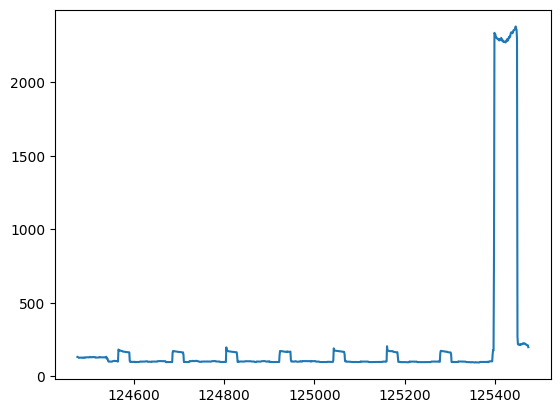

In [900]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [901]:
data['Wh']

124475    131.752306
124476    130.500979
124477    128.746155
124478    125.479261
124479    125.918153
             ...    
125470    212.001649
125471    211.528292
125472    211.131312
125473    210.501696
125474    197.889182
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

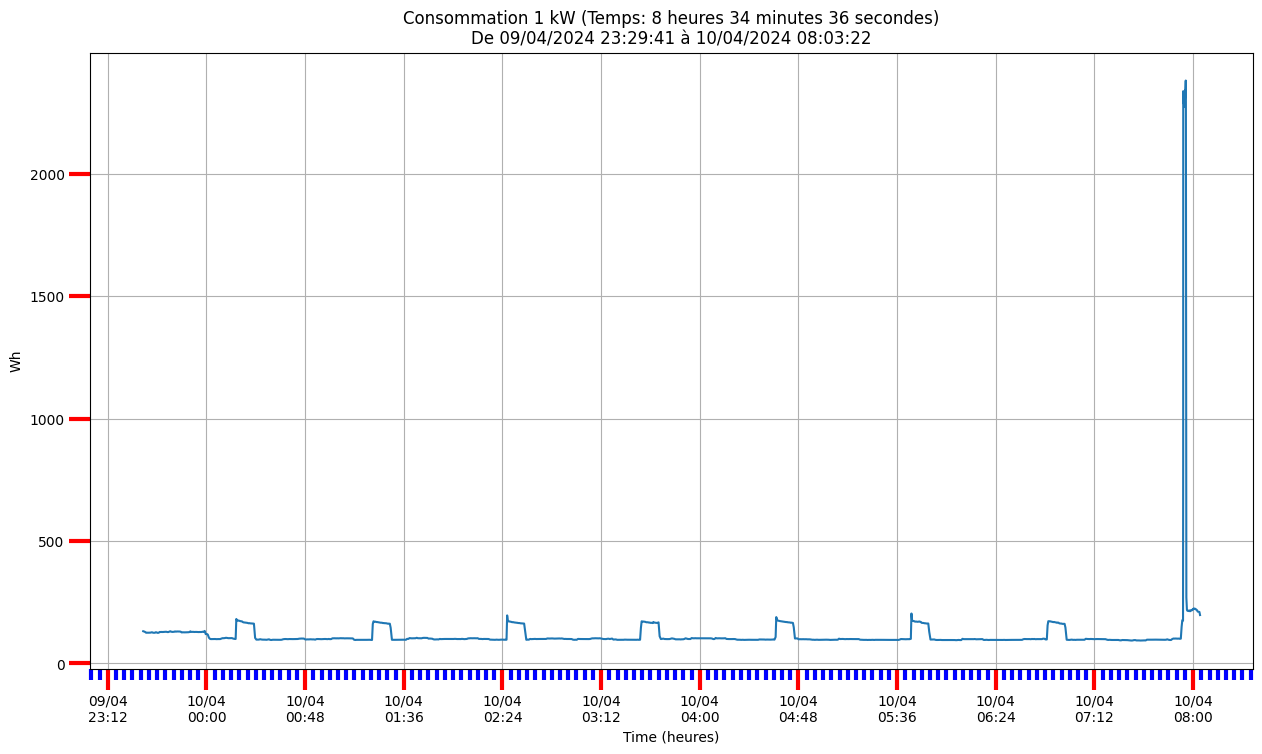

In [902]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

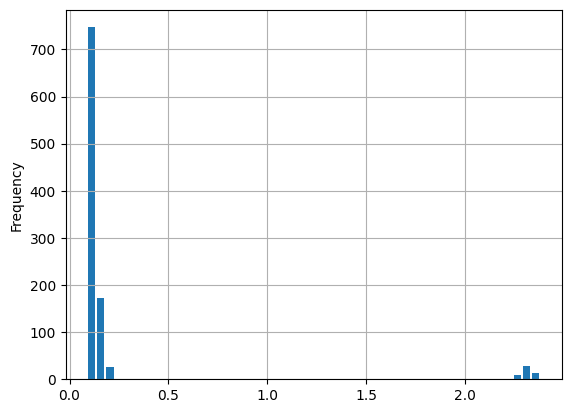

In [903]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [904]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
125470,16981,0.21,16.981,212.001649,2960494858,2024-04-10 08:02:13.040824,10/04/2024
125471,17019,0.21,17.019,211.528292,2960511877,2024-04-10 08:02:30.059824,10/04/2024
125472,17051,0.21,17.051,211.131312,2960528928,2024-04-10 08:02:47.110824,10/04/2024
125473,17102,0.21,17.102,210.501696,2960546030,2024-04-10 08:03:04.212824,10/04/2024
125474,18192,0.20,18.192,197.889182,2960564222,2024-04-10 08:03:22.404824,10/04/2024


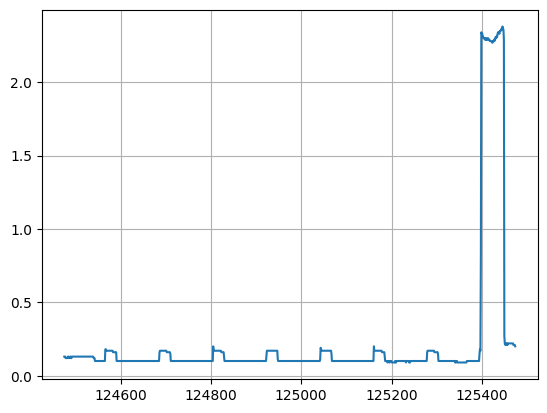

In [905]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [906]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(2960564222000.0, 49342.73703333333)

In [907]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 10, 8, 3, 34, 894715),
 datetime.datetime(2024, 3, 7, 1, 40, 50, 672715))

In [908]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(125475, 2960565, 822.3791666666667)

In [909]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [910]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [911]:
732/12 # 60 jours

61.0

In [912]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

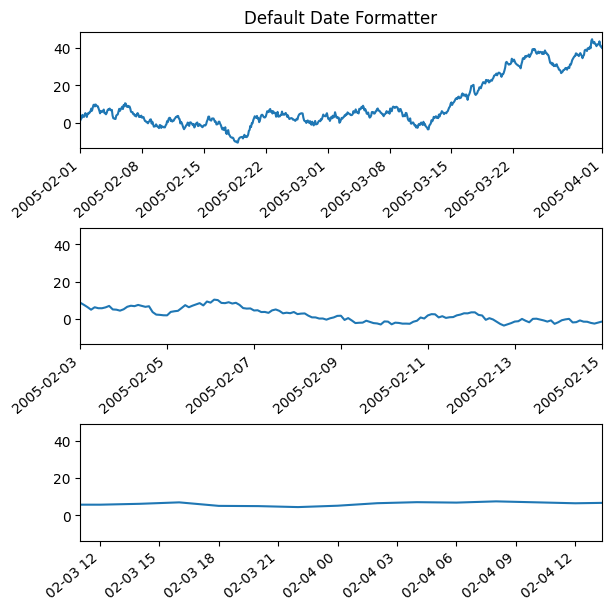

In [913]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [914]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)